# An√°lisis de `PR_Earthquake_Tweets_Jan2020.csv`

Este cuaderno presenta un an√°lisis estructurado de los datos de Twitter relacionados con los terremotos de Puerto Rico de enero de 2020. Incluye:

- **Carga y preprocesamiento de datos**.
- **An√°lisis de datos e ingenier√≠a de caracter√≠sticas**.
- **An√°lisis exploratorio de datos (EDA)**
- **Visualizaciones** utilizando bibliotecas como Pandas, Matplotlib, Seaborn, Plotly, PyWaffle y WordCloud.

El objetivo es extraer informaci√≥n significativa del contenido de los tweets y de los patrones de participaci√≥n, prestando atenci√≥n al uso del lenguaje, las tendencias temporales y las caracter√≠sticas textuales. Este cuaderno sirve tanto de informe anal√≠tico como de referencia para aplicar diversas herramientas de Python al an√°lisis de las redes sociales.

## 1. Importar bibliotecas

Las siguientes bibliotecas se utilizar√°n a lo largo del cuaderno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle
from wordcloud import WordCloud

## 2. Carga de datos

Cargar el CSV en un DataFrame de Pandas.

In [3]:
# Cargar CSV con cabecera deducida
df = pd.read_csv('PR_Earthquake_Tweets_Jan2020.csv')

print("Datos cargados. N√∫mero de filas:", df.shape[0])
df.head()

Datos cargados. N√∫mero de filas: 278


UTC_Time  \
0  2019-12-31 23:17:22+00:00   
1  2019-12-31 23:14:47+00:00   
2  2020-01-02 23:58:39+00:00   
3  2020-01-03 03:50:02+00:00   
4  2020-01-03 03:53:11+00:00   

                                       Tweet_Content       Post_ID  \
0  #TemblorPR En efecto, volvi√≥ a temblar en el s...  1.212151e+18   
1  #TemblorPR A 4.50 magnitude earthquake has occ...  1.212150e+18   
2  4.5 quake hits Puerto Rico amid rare seismic a...  1.212886e+18   
3  A 4.90 magnitude earthquake has occurred near ...  1.212944e+18   
4  El sismo al sur de Puerto Rico (11:41pm) fue d...  1.212945e+18   

                                           Tweet_URL  Reply_Count  \
0  https://x.com/Motinsitepegas/status/1212150785...          1.0   
1  https://x.com/TemblorPR/status/121215013370756...          0.0   
2  https://x.com/TemblorPR/status/121288595014728...          0.0   
3  https://x.com/TemblorPR/status/121294417951033...          1.0   
4  https://x.com/AbdielBonillaPR/status/121294497...          1.0   

   Repost_Count  Like_Count  View_Count  Bookmark_Count  \
0          22.0        13.0         0.0             0.0   
1          15.0        15.0         0.0             0.0   
2           8.0        11.0         0.0             1.0   
3          19.0        17.0         0.0             0.0   
4           7.0         5.0         0.0             0.0   

                                   Tweet_Image_URL  ... media_3_url  \
0  https://pbs.twimg.com/media/ENJstqRXYAMzChh.jpg  ...         NaN   
1  https://pbs.twimg.com/media/ENJsHTdWoAMtzjq.jpg  ...         NaN   
2                                              NaN  ...         NaN   
3                                              NaN  ...         NaN   
4                                              NaN  ...         NaN   

   binded_media_url  binded_media_domain  binded_media_thumbnail_url  \
0               NaN                  NaN                         NaN   
1               NaN                  NaN                         NaN   
2               NaN                  NaN                         NaN   
3               NaN                  NaN                         NaN   
4               NaN                  NaN                         NaN   

   binded_media_title  binded_media_description  is_retweeted  is_quoted  \
0                 NaN                       NaN           NaN        NaN   
1                 NaN                       NaN           NaN        NaN   
2                 NaN                       NaN           NaN        NaN   
3                 NaN                       NaN           NaN        NaN   
4                 NaN                       NaN           NaN        NaN   

   collected_at  input_url  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  

[5 rows x 50 columns]

## 3. Exploraci√≥n r√°pida

Inspeccionemos r√°pidamente los datos.

In [4]:
# Ver las primeras y √∫ltimas filas
print(df.head())
print(df.tail())

# Informaci√≥n resumida
df.info()
print(df.describe(include='all'))

# Comprobar si hay valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

                    UTC_Time  \
0  2019-12-31 23:17:22+00:00   
1  2019-12-31 23:14:47+00:00   
2  2020-01-02 23:58:39+00:00   
3  2020-01-03 03:50:02+00:00   
4  2020-01-03 03:53:11+00:00   

                                       Tweet_Content       Post_ID  \
0  #TemblorPR En efecto, volvi√≥ a temblar en el s...  1.212151e+18   
1  #TemblorPR A 4.50 magnitude earthquake has occ...  1.212150e+18   
2  4.5 quake hits Puerto Rico amid rare seismic a...  1.212886e+18   
3  A 4.90 magnitude earthquake has occurred near ...  1.212944e+18   
4  El sismo al sur de Puerto Rico (11:41pm) fue d...  1.212945e+18   

                                           Tweet_URL  Reply_Count  \
0  https://x.com/Motinsitepegas/status/1212150785...          1.0   
1  https://x.com/TemblorPR/status/121215013370756...          0.0   
2  https://x.com/TemblorPR/status/121288595014728...          0.0   
3  https://x.com/TemblorPR/status/121294417951033...          1.0   
4  https://x.com/AbdielBonillaPR/status/

## 4. Limpieza de datos e ingenier√≠a de caracter√≠sticas

Este paso de preprocesamiento prepara el conjunto de datos para el an√°lisis realizando las siguientes acciones:

- Eliminaci√≥n de columnas que s√≥lo contienen valores perdidos.
- Eliminaci√≥n de columnas redundantes o irrelevantes, como ID, URL, metadatos multimedia y m√©tricas de interacci√≥n duplicadas.
- Se han rellenado los valores que faltaban en las columnas num√©ricas y se han convertido en enteros.
- Se ha creado una nueva caracter√≠stica `Total_Engagement` mediante la suma de respuestas, reposiciones, me gusta y favoritos.
- Se han seleccionado s√≥lo las columnas relevantes para el an√°lisis: `Post_ID`, `Tweet_Content`, `Total_Engagement` y `Language`.
- Se ha a√±adido la funci√≥n `Tweet_Length`, que representa el n√∫mero de caracteres de cada tuit.

El conjunto de datos resultante es un subconjunto limpio y centrado, optimizado para el an√°lisis y la visualizaci√≥n.

In [5]:
import pandas as pd

# Paso 1: Eliminar las columnas con valores nulos
df = pd.read_csv("PR_Earthquake_Tweets_Jan2020.csv")
df = df.dropna(axis=1, how='all')

# Paso 2: Eliminar columnas redundantes o duplicadas conocidas
redundant_cols = [
    'id', 'object', 'result_position', 'task_id', 'internal_unique_id',
    'tweet_url', 'original_tweet_url', 'name', 'user_id', 'username',
    'published_at', 'content', 'views_count', 'retweet_count', 'likes',
    'quote_count', 'reply_count', 'bookmarks_count',
    'media_0_thumbnail', 'media_0_type', 'media_0_url',
    'media_1_thumbnail', 'media_1_type', 'media_1_url',
    'media_2_thumbnail', 'media_2_type', 'media_2_url',
    'media_3_thumbnail', 'media_3_type', 'media_3_url',
    'binded_media_url', 'binded_media_domain', 'binded_media_thumbnail_url',
    'binded_media_title', 'binded_media_description',
    'is_retweeted', 'is_quoted', 'collected_at', 'input_url'
]
df = df.drop(columns=[col for col in redundant_cols if col in df.columns])

# Paso 3: Rellenar y convertir las columnas de compromiso
engagement_cols = ["Reply_Count", "Repost_Count", "Like_Count", "Bookmark_Count"]
for col in engagement_cols:
    df[col] = df[col].fillna(0).astype(int)

# Paso 4: Crear columna Total_Engagement
df["Total_Engagement"] = df["Reply_Count"] + df["Repost_Count"] + df["Like_Count"] + df["Bookmark_Count"]

# Paso 5: Renombrar y convertir la hora UTC para el an√°lisis basado en el tiempo
df["Timestamp_UTC"] = pd.to_datetime(df["UTC_Time"])

# Paso 6: Seleccionar las columnas relevantes
df_selected = df[["Post_ID", "Tweet_Content", "Total_Engagement", "Language", "Timestamp_UTC"]].copy()

# Paso 7: A√±adir columna Tweet_Length
df_selected["Tweet_Length"] = df_selected["Tweet_Content"].str.len()

# Paso 8: A√±adir Tweet_Length_Category basado en bins de longitud
# Definir los intervalos de longitud de los tweets y las etiquetas
length_bins = [0, 80, 140, 200, 280, df_selected["Tweet_Length"].max()]
length_labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Crear una nueva columna categ√≥rica.
df_selected["Tweet_Length_Category"] = pd.cut(
    df_selected["Tweet_Length"],
    bins=length_bins,
    labels=length_labels,
    include_lowest=True
)

# Vista previa del DataFrame limpio y transformado
print("DataFrame limpio y transformado:")
df_selected.head()


DataFrame limpio y transformado:


Post_ID                                      Tweet_Content  \
0  1.212151e+18  #TemblorPR En efecto, volvi√≥ a temblar en el s...   
1  1.212150e+18  #TemblorPR A 4.50 magnitude earthquake has occ...   
2  1.212886e+18  4.5 quake hits Puerto Rico amid rare seismic a...   
3  1.212944e+18  A 4.90 magnitude earthquake has occurred near ...   
4  1.212945e+18  El sismo al sur de Puerto Rico (11:41pm) fue d...   

   Total_Engagement Language             Timestamp_UTC  Tweet_Length  \
0                36       es 2019-12-31 23:17:22+00:00           223   
1                30       en 2019-12-31 23:14:47+00:00           145   
2                20       es 2020-01-02 23:58:39+00:00            94   
3                37       en 2020-01-03 03:50:02+00:00           122   
4                13       es 2020-01-03 03:53:11+00:00           104   

  Tweet_Length_Category  
0                  Long  
1                Medium  
2                 Short  
3                 Short  
4                 Short

## 5. An√°lisis y exploraci√≥n de datos

### üü¶ SECCI√ìN A: An√°lisis de la distribuci√≥n

Estos gr√°ficos muestran la forma y la distribuci√≥n de las dos caracter√≠sticas num√©ricas principales:
- **Total_Engagement:** Cu√°nta atenci√≥n recibieron los tweets.
- **Longitud_Tweet:** N√∫mero de caracteres de cada tweet.
- **Language:** Espa√±ol o ingl√©s

Utilizamos histogramas para ver la distribuci√≥n y gr√°ficos de caja para detectar valores at√≠picos.

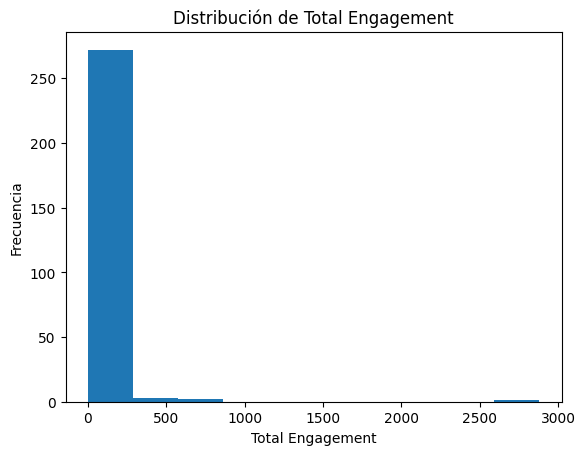

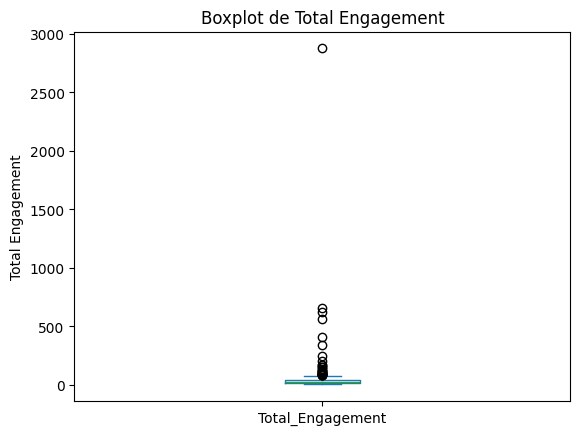

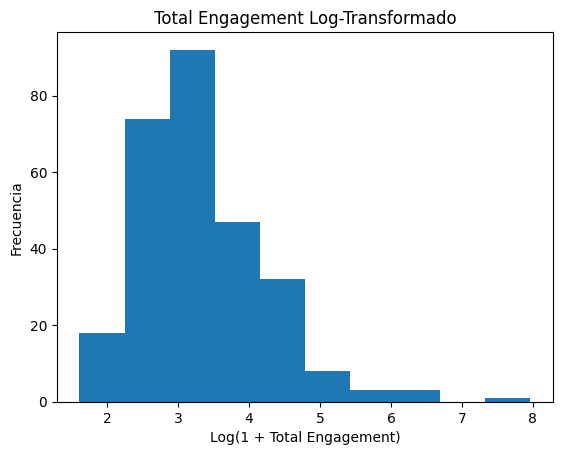

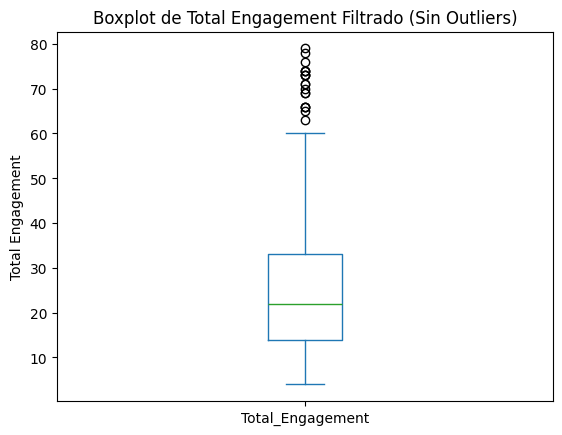

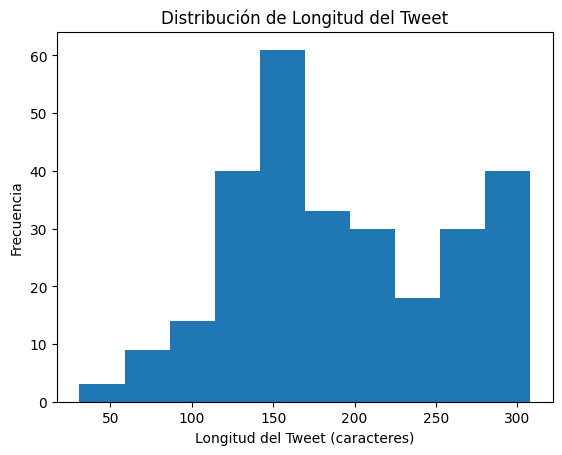

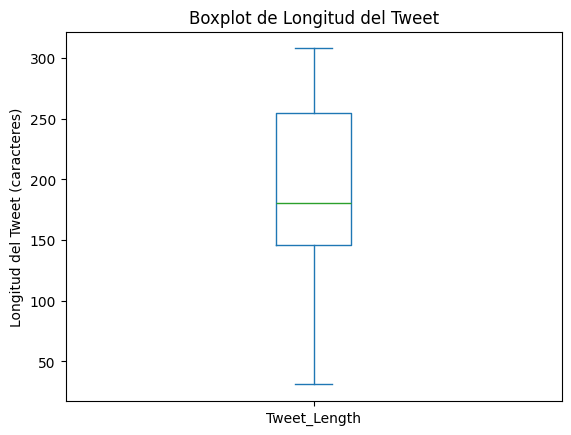

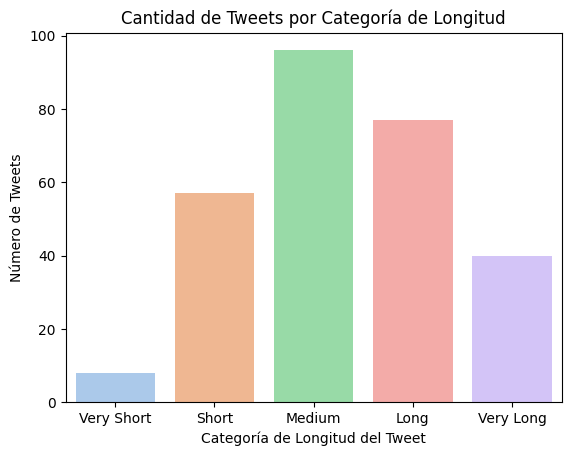

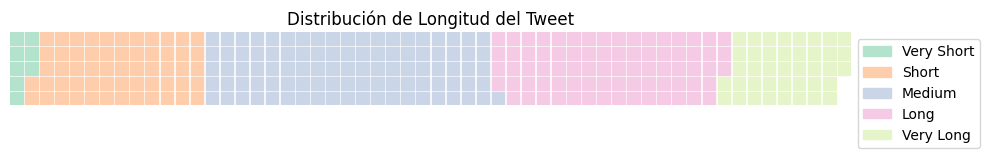

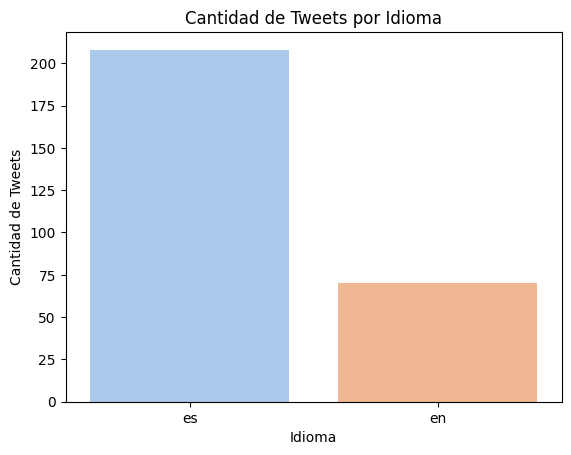

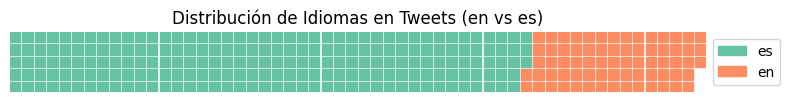

In [6]:
# ======================================================
# SECCI√ìN A: DISTRIBUCI√ìN DE TOTAL ENGAGEMENT E INSIGHTS
# ======================================================

# Histograma: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="hist", bins=10, title="Distribuci√≥n de Total Engagement")
plt.xlabel("Total Engagement")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement")
plt.ylabel("Total Engagement")
plt.show()

# Transformaci√≥n logar√≠tmica de Total Engagement para mejor escala
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected["Log_Total_Engagement"].plot(kind="hist", bins=10, title="Total Engagement Log-Transformado")
plt.xlabel("Log(1 + Total Engagement)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement filtrado por IQR (eliminando outliers extremos)
Q1 = df_selected["Total_Engagement"].quantile(0.25)
Q3 = df_selected["Total_Engagement"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_selected[
    (df_selected["Total_Engagement"] >= Q1 - 1.5 * IQR) &
    (df_selected["Total_Engagement"] <= Q3 + 1.5 * IQR)
]

filtered_df["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement Filtrado (Sin Outliers)")
plt.ylabel("Total Engagement")
plt.show()


# ======================================================
# SECCI√ìN B: DISTRIBUCI√ìN Y CATEGORIZACI√ìN DE LONGITUD DE TWEETS
# ======================================================

# Histograma: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="hist", bins=10, title="Distribuci√≥n de Longitud del Tweet")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="box", title="Boxplot de Longitud del Tweet")
plt.ylabel("Longitud del Tweet (caracteres)")
plt.show()

# Gr√°fico de barras: N√∫mero de tweets por categor√≠a de longitud
sns.countplot(
    x="Tweet_Length_Category",
    hue="Tweet_Length_Category",  # mismo valor que x para aplicar bien la paleta
    data=df_selected,
    order=["Very Short", "Short", "Medium", "Long", "Very Long"],
    palette="pastel",
    legend=False
)
plt.title("Cantidad de Tweets por Categor√≠a de Longitud")
plt.xlabel("Categor√≠a de Longitud del Tweet")
plt.ylabel("N√∫mero de Tweets")
plt.show()

# Gr√°fico tipo waffle: Distribuci√≥n por categor√≠a de longitud
length_counts = df_selected["Tweet_Length_Category"].value_counts().sort_index().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=length_counts,
    figsize=(10, 4),
    title={"label": "Distribuci√≥n de Longitud del Tweet", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9"],
    block_arranging_style='snake',
)
plt.show()


# ======================================================
# SECCI√ìN C: DISTRIBUCI√ìN DE IDIOMAS
# ======================================================

# Gr√°fico de barras: Tweets por idioma
if "Language" in df_selected.columns:
    sns.countplot(
        x="Language",
        hue="Language",
        data=df_selected,
        palette="pastel",
        legend=False
    )
    plt.title("Cantidad de Tweets por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Cantidad de Tweets")
    plt.show()

# Gr√°fico tipo waffle: Distribuci√≥n de idiomas
language_counts = df_selected["Language"].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=language_counts,
    figsize=(8, 4),
    title={"label": "Distribuci√≥n de Idiomas en Tweets (en vs es)", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#66c2a5", "#fc8d62"],
    block_arranging_style='snake',
)
plt.show()


### üìä **Compromiso total**

#### üîπ Histograma
- La distribuci√≥n bruta de `Total_Engagement` es **altamente sesgada a la derecha**.
- La gran mayor√≠a de los tuits reciben una participaci√≥n m√≠nima.
- Un peque√±o n√∫mero de tweets son **extremos at√≠picos** con un engagement muy alto (algunos superan los 2500-2900).

#### üîπ Boxplot (sin procesar)
- Muestra la **extrema dispersi√≥n** en el compromiso.
- La **mediana** es bastante baja, y un pu√±ado de valores at√≠picos distorsionan significativamente la escala.

#### üîπ Histograma con transformaci√≥n logar√≠tmica
- Aplicar una transformaci√≥n logar√≠tmica (`log(1 + Compromiso_Total)`) ayuda a **normalizar** los datos.
- Los valores transformados siguen una curva **m√°s sim√©trica, en forma de campana**, haciendo que la distribuci√≥n sea m√°s f√°cil de interpretar y comparar.

#### üîπ Boxplot filtrado (sin valores at√≠picos)
- Tras aplicar un filtro IQR para eliminar los valores extremos, la distribuci√≥n revela un patr√≥n de participaci√≥n m√°s t√≠pico.
- La mayor√≠a de los tuits reciben entre **10 y 35 interacciones**, con una **media en torno a 22**.
- Sigue habiendo algunos valores at√≠picos moderados, pero la escala general es ahora m√°s interpretable.

#### ‚úÖ An√°lisis:
> `Total_Engagement` est√° muy sesgado, con unos pocos tuits virales que distorsionan los res√∫menes visuales y estad√≠sticos. Tanto la **transformaci√≥n logar√≠tmica** como el **filtrado basado en IQR** son formas eficaces de obtener una visi√≥n m√°s clara del grueso de la distribuci√≥n.

---

### üìù **Longitud del tuit**

#### üîπ Histograma
- La distribuci√≥n es **pareja** con algunos picos, posiblemente **ligeramente bimodal**.
- Una gran concentraci√≥n de tuits se sit√∫a entre **120-300 caracteres**.
- Los picos en torno a **150** y **280** probablemente reflejan el comportamiento com√∫n de los tuits y el l√≠mite de caracteres de Twitter.

#### üîπ Boxplot
- La longitud de los tuits oscila entre **30 y m√°s de 300 caracteres**.
- La mediana se aproxima a los 180 caracteres.
- La distribuci√≥n es **bastante sim√©trica** sin valores at√≠picos extremos.

#### üîπ Categor√≠as de longitud de los tweets (Bar & Waffle)
- La mayor√≠a de los tuits entran en las categor√≠as **Medio** y **Largo**.
- Los **Tweets muy largos** son bastante comunes, lo que probablemente refleja que los usuarios maximizan el l√≠mite de caracteres.
- Los **tweets muy cortos** son poco frecuentes, lo que sugiere que los tweets con poco contexto son poco comunes durante acontecimientos como cat√°strofes naturales.
- Tanto el **diagrama de barras** como el **diagrama waffle** ofrecen una visi√≥n clara y coherente de c√≥mo se distribuyen las longitudes de los tuits entre las distintas categor√≠as.

#### ‚úÖ An√°lisis:
> La longitud de los tuits es coherente y est√° bien distribuida. La adici√≥n de **categor√≠as de longitud** ayuda a segmentar a los usuarios por estilo de comunicaci√≥n. La mayor√≠a de los usuarios publican tuits de longitud media a larga, lo que puede reflejar la urgencia o el detalle de las conversaciones impulsadas por eventos.
---

### üåê **Patrones de tuits basados en el lenguaje**

#### üîπ Gr√°fico de recuento
- La **mayor√≠a de los tweets** est√°n en espa√±ol (`es`), lo que supone aproximadamente el **75%** del conjunto de datos.
- Los tweets en ingl√©s (`es`) son **significativamente menos**, lo que sugiere que los hispanohablantes publicaron m√°s activamente durante este evento.
- Este desequilibrio podr√≠a reflejar el **idioma dominante** de la regi√≥n o el p√∫blico afectado.

#### üîπ Gr√°fico de gofres
- Ofrece una confirmaci√≥n **visualmente intuitiva** del gr√°fico de recuento.
- Cada bloque representa aproximadamente un tweet; la diferencia visual entre `es` y `en` es clara y refuerza las mismas proporciones.
- Ayuda a **comunicar r√°pidamente la distribuci√≥n** a p√∫blicos no t√©cnicos.

#### ‚úÖ An√°lisis:
> El conjunto de datos est√° **desviado hacia el espa√±ol**, lo que puede influir en el **an√°lisis de texto**, las **m√©tricas de compromiso** y el **modelo**. Considera **estratificar o equilibrar** por idioma cuando compares comportamientos de tweets o entrenes clasificadores.

---

### Interpretaci√≥n general

- El **`Compromiso_total`** requiere transformaci√≥n o filtrado debido a la **excesiva asimetr√≠a y a los valores at√≠picos extremos**. Las versiones **transformadas logar√≠tmicamente** o **filtradas** deben utilizarse para modelos estad√≠sticos o comparaciones de grupos.
- La longitud de los tweets es una variable fiable que se comporta bien y puede utilizarse directamente en los an√°lisis sin modificaciones.
- **Idioma** desequilibrado, con predominio de tweets en espa√±ol, lo que puede sesgar los an√°lisis comparativos o predictivos.

### üü¶ SECCI√ìN B: Tendencias temporales

Estos gr√°ficos muestran c√≥mo evolucionan el `Total_Engagement` y la `Tweet_Length` a lo largo del tiempo utilizando la fecha y hora reales de publicaci√≥n (`Timestamp_UTC`).

- El gr√°fico de l√≠neas del compromiso a lo largo del tiempo ayuda a identificar los picos de atenci√≥n e interacci√≥n del p√∫blico.
- El gr√°fico de l√≠neas de la longitud de los tweets a lo largo del tiempo muestra los cambios en la composici√≥n de los tweets, por ejemplo si los usuarios se vuelven m√°s expresivos o concisos.

Esta visi√≥n temporal proporciona informaci√≥n sobre el comportamiento de los usuarios y las pautas de participaci√≥n a medida que se desarrollan los acontecimientos.

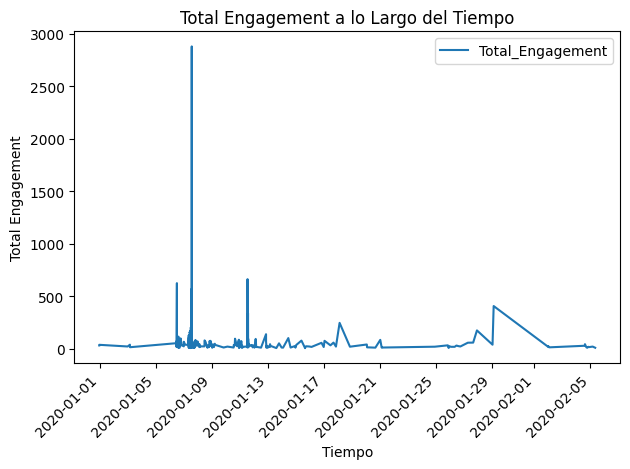

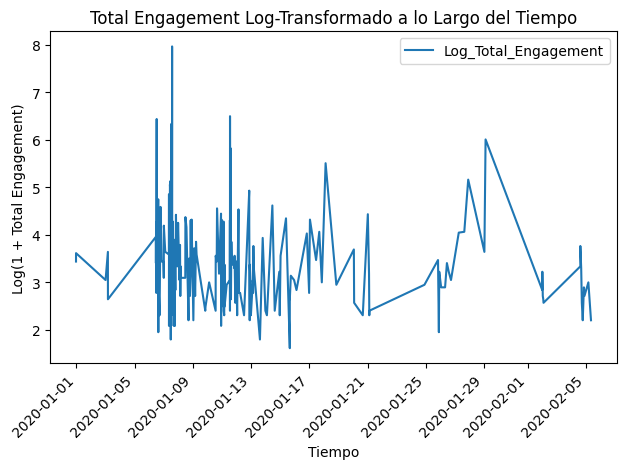

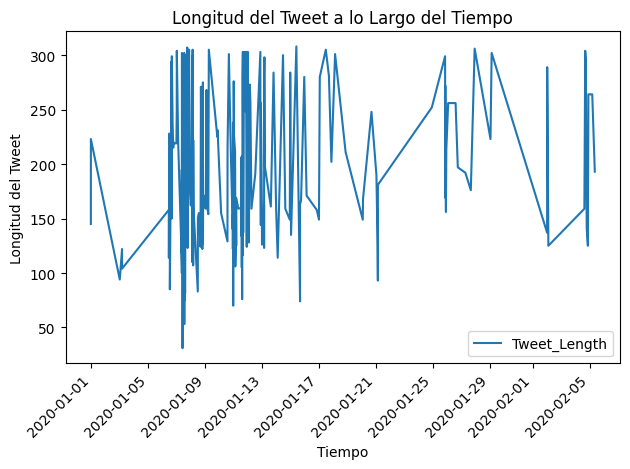

In [8]:
# -------------------------------------------
# SECCI√ìN B: TENDENCIAS TEMPORALES
# -------------------------------------------

# Gr√°fico de l√≠nea: Total Engagement a lo largo del tiempo (valores brutos)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Total_Engagement", kind="line",
    title="Total Engagement a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gr√°fico de l√≠nea: Total Engagement log-transformado a lo largo del tiempo
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Log_Total_Engagement", kind="line",
    title="Total Engagement Log-Transformado a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Log(1 + Total Engagement)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gr√°fico de l√≠nea: Longitud del Tweet a lo largo del tiempo
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Tweet_Length", kind="line",
    title="Longitud del Tweet a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Longitud del Tweet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### üìà **An√°lisis de Tendencias Temporales**

---

### üîπ Total Engagement a lo Largo del Tiempo (Bruto)

- Este gr√°fico muestra un **pico pronunciado alrededor del 9 de enero**, alcanzando casi **3,000 interacciones**. Probablemente est√© relacionado con un evento importante (por ejemplo, un gran terremoto o una noticia de √∫ltimo momento).
- El engagement durante el resto del per√≠odo es **relativamente plano**, con solo picos menores y actividad espor√°dica.
- La interpretaci√≥n es dif√≠cil debido a que los **valores extremos dominan la escala**, comprimiendo los d√≠as con menor actividad.

#### ‚úÖ An√°lisis:
> Aunque √∫til para identificar picos importantes, la l√≠nea de engagement bruto est√° muy sesgada y oculta fluctuaciones menores. Utiliza la versi√≥n transformada logar√≠tmicamente para una mejor resoluci√≥n.

---

### üîπ Total Engagement a lo Largo del Tiempo (Transformaci√≥n Logar√≠tmica)

- Tras aplicar `log(1 + Total_Engagement)`, la **tendencia de engagement se vuelve m√°s clara e interpretable** a lo largo de toda la l√≠nea de tiempo.
- Ahora se pueden observar **variaciones diarias** en el engagement, incluyendo actividad moderada fuera del pico principal.
- Se nota un aumento visible a finales de enero, que antes estaba comprimido en la escala bruta.

#### ‚úÖ An√°lisis:
> La escala logar√≠tmica ayuda a **revelar patrones significativos** en todos los niveles de engagement, no solo en los valores at√≠picos. Esta versi√≥n es mejor para comparar el comportamiento a lo largo del tiempo.

---

### üîπ Longitud de Tweets a lo Largo del Tiempo

- Los tweets parecen ser consistentemente largos durante todo el per√≠odo, muchos **cerca del l√≠mite de 280 caracteres**.
- No se observa una tendencia temporal fuerte, pero s√≠ hay cierta **variabilidad**, especialmente de mediados a finales de enero, donde la longitud fluct√∫a m√°s.
- Los picos pueden corresponder a tweets m√°s detallados o emocionalmente expresivos durante momentos clave.

#### ‚úÖ An√°lisis:
> La longitud de los tweets no muestra una tendencia temporal clara, pero podr√≠an existir **cambios impulsados por el contexto** que valga la pena explorar (por ejemplo, por evento, sentimiento o idioma).

---

### üß† Resumen

| Gr√°fico                           | Punto Fuerte Principal           | Cu√°ndo Usarlo                            |
|----------------------------------|----------------------------------|------------------------------------------|
| **Engagement Bruto**             | Destaca eventos extremos         | √ötil para identificar picos importantes  |
| **Engagement Transformado (Log)**| Aclara tendencias en la l√≠nea de tiempo | Ideal para observar patrones generales   |
| **Longitud de Tweets en el Tiempo** | Refleja comportamiento expresivo | Puede apoyar an√°lisis centrados en contenido |


### üü¶ SECCI√ìN C: Comparaciones Basadas en el Idioma

Comparamos el comportamiento de los tweets seg√∫n el idioma:

- **Gr√°fico de Conteo**: Muestra cu√°ntos tweets se publicaron en cada idioma.
- **Gr√°fico de Barras**: Compara los niveles promedio de engagement por idioma.
- **Gr√°fico de Dispersi√≥n (Strip Plot)**: Revela la distribuci√≥n y variabilidad del engagement en cada idioma.

En conjunto, estos gr√°ficos permiten identificar qu√© comunidades ling√º√≠sticas fueron m√°s activas y generaron mayor interacci√≥n.

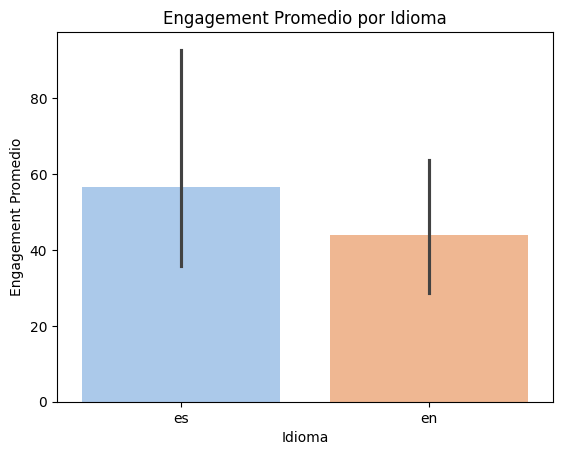

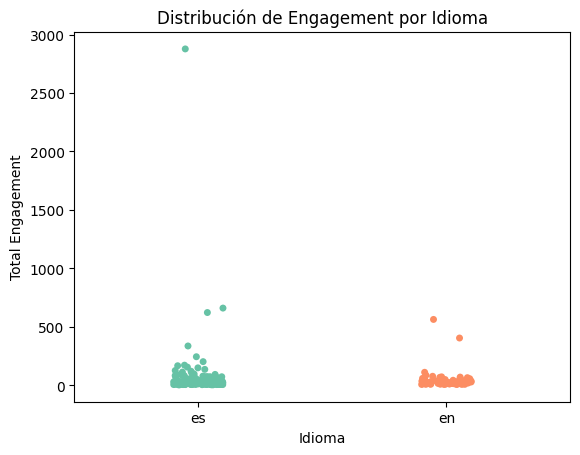

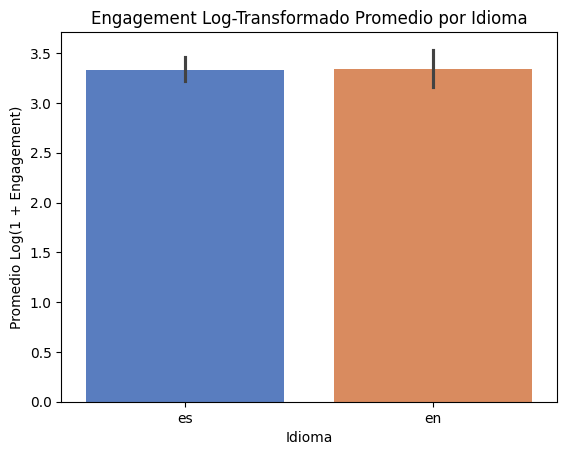

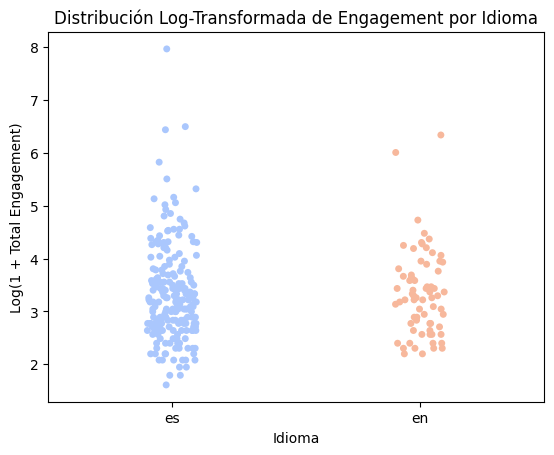

In [9]:
# -------------------------------------------
# SECCI√ìN C: COMPARACIONES BASADAS EN IDIOMA
# -------------------------------------------

# Gr√°fico de barras (Seaborn): Promedio de Total Engagement por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="pastel", legend=False)
    plt.title("Engagement Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Engagement Promedio")
    plt.show()

# Gr√°fico tipo strip: Distribuci√≥n bruta de engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="Set2", jitter=True, legend=False)
    plt.title("Distribuci√≥n de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Total Engagement")
    plt.show()

# -------------------------------------------
# NUEVO: Engagement Log-Transformado por Idioma
# -------------------------------------------

# Asegurarse de que la columna log-transformada existe
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])

# Gr√°fico de barras: Promedio de engagement log-transformado por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="muted", legend=False)
    plt.title("Engagement Log-Transformado Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Promedio Log(1 + Engagement)")
    plt.show()

# Gr√°fico tipo strip: Distribuci√≥n log-transformada del engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="coolwarm", jitter=True, legend=False)
    plt.title("Distribuci√≥n Log-Transformada de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Log(1 + Total Engagement)")
    plt.show()


### üåê **Comparaciones Basadas en el Idioma**

---

### üîπ Cantidad de Tweets por Idioma (Barras + Waffle)

- **Gr√°fico de Barras**: Se publicaron significativamente m√°s tweets en **espa√±ol (`es`)** que en ingl√©s (`en`), en una proporci√≥n aproximada de **3:1**.
- **Gr√°fico tipo Waffle**: Refuerza claramente esta desproporci√≥n utilizando una cuadr√≠cula visualmente intuitiva.

#### ‚úÖ An√°lisis:
> El espa√±ol domina el conjunto de datos, lo que sugiere un enfoque hacia una audiencia local o una mayor participaci√≥n de usuarios hispanohablantes.

---

### üîπ Engagement Promedio por Idioma (Bruto)

- Los tweets en espa√±ol (`es`) tienen un **promedio de engagement total m√°s alto** que los tweets en ingl√©s.
- Sin embargo, las **barras de error** son grandes, lo que indica una **alta variabilidad**, probablemente debido a algunos tweets virales en espa√±ol que distorsionan el promedio.

#### ‚úÖ An√°lisis:
> Los tweets en espa√±ol parecen generar m√°s engagement en promedio, pero los resultados pueden estar influenciados por **valores at√≠picos**. Es recomendable usar la transformaci√≥n logar√≠tmica para confirmar.

---

### üîπ Distribuci√≥n de Engagement por Idioma (Strip Plot - Bruto)

- Los tweets en espa√±ol tienen **varios outliers con alto engagement** (superando los 500 e incluso cerca de 3,000).
- Los tweets en ingl√©s est√°n m√°s agrupados por debajo de los 200, con menos casos extremos.
- La escala visual est√° distorsionada por estos outliers, lo que dificulta comparar el comportamiento t√≠pico de los tweets.

#### ‚úÖ An√°lisis:
> Los totales brutos destacan los casos extremos, pero **ocultan los patrones generales**. La mayor√≠a de los tweets en ambos idiomas reciben engagement bajo o moderado.

---

### üîπ Engagement Promedio por Idioma (Transformaci√≥n Logar√≠tmica)

- Tras la transformaci√≥n logar√≠tmica, la **diferencia en engagement promedio entre `es` y `en` pr√°cticamente desaparece**.
- Ambos idiomas muestran un promedio muy similar de engagement logar√≠tmico (~3.3), con una varianza m√≠nima.

#### ‚úÖ An√°lisis:
> Una vez ajustados los outliers, **ambos idiomas muestran comportamientos de engagement casi id√©nticos**. La diferencia anterior era impulsada principalmente por casos extremos.

---

### üîπ Distribuci√≥n de Engagement Logar√≠tmico por Idioma

- La distribuci√≥n transformada es **m√°s compacta, suave y sim√©trica** para ambos idiomas.
- El espa√±ol sigue mostrando una dispersi√≥n ligeramente mayor, pero la mayor√≠a de los tweets se encuentran en el rango de **log(1 + engagement) = 2.5 a 5**.
- **Un tweet extremo en `es`** alcanza 8, y algunos tweets en `en` superan 6.

#### ‚úÖ An√°lisis:
> Este gr√°fico revela un **comportamiento de engagement comparable** entre idiomas, aunque el espa√±ol presenta un rango ligeramente m√°s amplio.

---

### üß† Conclusiones Finales:

| M√©trica                                | Resultados Brutos                 | Vista Transformada (Log)            |
|----------------------------------------|-----------------------------------|-------------------------------------|
| **Cantidad de Tweets**                 | Domina el espa√±ol (`es`)          | ‚Äî                                   |
| **Engagement Promedio**                | Mayor en `es`, pero variable      | Casi id√©ntico (`es` ‚âà `en`)         |
| **Distribuci√≥n del Engagement**        | Sesgada; `es` con outliers altos  | Ambos idiomas se ven equilibrados   |
| **Conclusi√≥n Pr√°ctica**                | Los tweets en espa√±ol tienen picos m√°s altos | Los tweets en ingl√©s son m√°s consistentes |


### üü¶ SECCI√ìN D: Relaci√≥n entre caracter√≠sticas

Usamos un **scatter plot** y **gr√°fico de barras** para probar si hay relaci√≥n entre:

- **Tweet_Length** (eje x)
- **Compromiso_total** (eje y)

Ayuda a responder: *¬øLos tweets m√°s largos tienden a recibir m√°s atenci√≥n?*

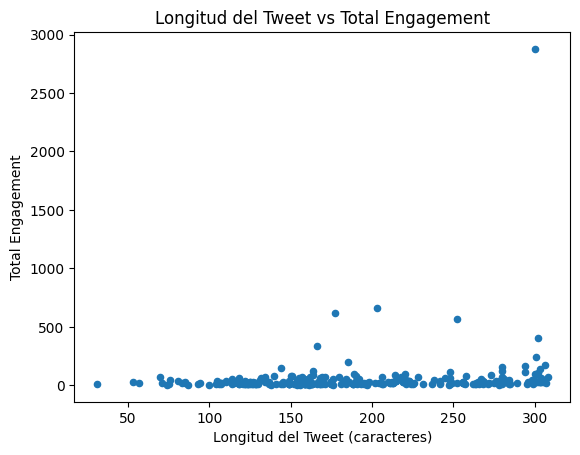

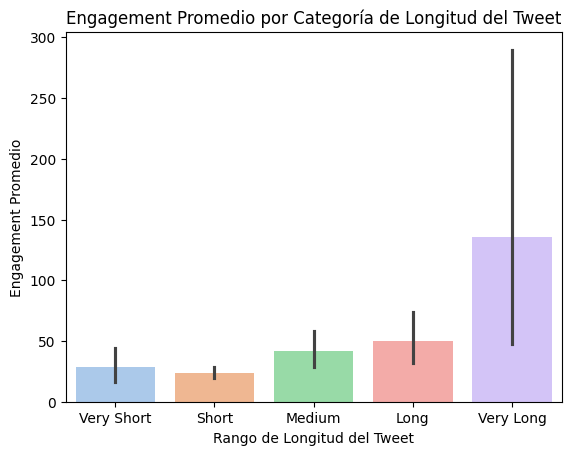

In [10]:
# -------------------------------------------
# SECCI√ìN D: RELACI√ìN ENTRE CARACTER√çSTICAS
# -------------------------------------------

# Gr√°fico de dispersi√≥n: Longitud del Tweet vs. Total Engagement
df_selected.plot(kind="scatter", x="Tweet_Length", y="Total_Engagement", title="Longitud del Tweet vs Total Engagement")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Total Engagement")
plt.show()

# Gr√°fico de barras: Promedio de Engagement por Categor√≠a de Longitud del Tweet
sns.barplot(x="Tweet_Length_Category", y="Total_Engagement", hue="Tweet_Length_Category", data=df_selected, palette="pastel", legend=False)
plt.title("Engagement Promedio por Categor√≠a de Longitud del Tweet")
plt.xlabel("Rango de Longitud del Tweet")
plt.ylabel("Engagement Promedio")
plt.show()

### üîó **Relaci√≥n entre la longitud del Tweet y la participaci√≥n**

#### üîπ Gr√°fico de dispersi√≥n: longitud del Tweet frente al compromiso total
- La mayor√≠a de los puntos est√°n **agrupados en el extremo inferior del eje de compromiso**, lo que confirma que **los tuits cortos-medios suelen recibir poco compromiso**.
- Aparece una **tendencia positiva clara** para los **tweets m√°s largos**, con varios valores at√≠picos por encima de **500+ interacciones**, especialmente cerca de la marca de **280-300 caracteres**.
- Un valor at√≠pico extremo** (~2900 interacciones) corresponde a un **tweet muy largo**, lo que refuerza el patr√≥n.

#### üîπ Gr√°fico de barras: participaci√≥n media por categor√≠a de longitud
- La participaci√≥n media aumenta de forma constante** con la longitud del tuit.
- Los **tweets muy largos (280 caracteres o m√°s)** tienen el **compromiso medio m√°s alto** con diferencia, lo que sugiere que los usuarios tienden a comprometerse m√°s con los tweets ricos en contenido.
- La varianza (barras de error) tambi√©n **se ampl√≠a con la longitud**, lo que indica **menos previsibilidad**, pero tambi√©n **mayor compromiso** en los tuits m√°s largos.

#### ‚úÖ An√°lisis:
> Existe una **clara correlaci√≥n positiva** entre la longitud del tuit y el engagement. Aunque no todos los tweets largos se convierten en virales, la **probabilidad de un alto compromiso** aumenta con la longitud del tweet. Esta idea apoya el uso de **tweets m√°s largos** para impulsar la interacci√≥n p√∫blica, especialmente durante eventos de gran impacto.

### üü¶ SECCI√ìN E: Matriz de correlaci√≥n

Este mapa de calor muestra el **coeficiente de correlaci√≥n** entre:

- `Total_Engagement`
- `Tweet_Length`

Los valores de correlaci√≥n oscilan entre:
- **+1** = fuertemente positivo
- **0** = sin correlaci√≥n
- **-1** = fuertemente negativo

Esto confirma o cuestiona lo que vimos en el gr√°fico de dispersi√≥n.

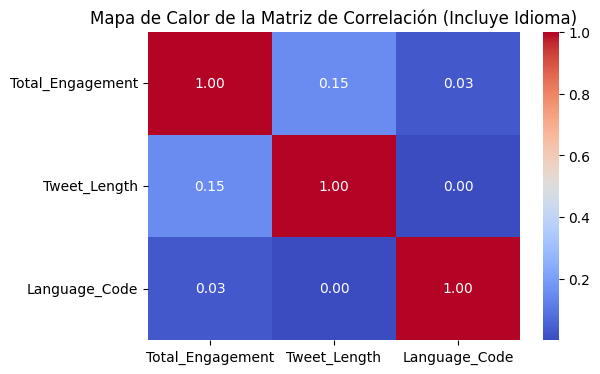

In [11]:
# -------------------------------------------
# SECCI√ìN E: MATRIZ DE CORRELACI√ìN
# -------------------------------------------

# Mapa de calor: Correlaci√≥n entre variables num√©ricas

# Convertir idioma a c√≥digos num√©ricos para incluir en la correlaci√≥n
df_selected["Language_Code"] = df_selected["Language"].map({"en": 0, "es": 1})

# Matriz de correlaci√≥n incluyendo el c√≥digo del idioma
corr_matrix = df_selected[["Total_Engagement", "Tweet_Length", "Language_Code"]].corr()

# Mapa de calor de la matriz de correlaci√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlaci√≥n (Incluye Idioma)")
plt.show()


### üßÆ **Matriz de correlaciones (incluida la lengua)**

#### üîπ Observaciones:
- **`Tweet_Length` y `Total_Engagement`** muestran una **d√©bil correlaci√≥n positiva** (‚âà 0,15), lo que sugiere que los tuits m√°s largos tienden a recibir algo m√°s de engagement - coherente con anteriores percepciones visuales.
- El c√≥digo de idioma (0 = ingl√©s, 1 = espa√±ol) tiene una correlaci√≥n cercana a cero tanto con la longitud del tweet como con el compromiso total:
  - **0,03** con el compromiso
  - **0,00** con la longitud del tweet
- Estos valores tan bajos indican que, en este conjunto de datos, el idioma por s√≠ solo no es un factor determinante** de la longitud de los tweets ni de la participaci√≥n.

#### ‚úÖ An√°lisis:
> El mapa de correlaci√≥n confirma que **la longitud del tweet tiene una relaci√≥n leve con el compromiso**, mientras que **el idioma no muestra una correlaci√≥n significativa**. Esto sugiere que los patrones de compromiso son **en gran medida independientes del idioma** y est√°n m√°s influenciados por otros factores como la riqueza del contenido o el contexto.

### üü¶ SECCI√ìN F: Visualizaciones Interactivas con Plotly

Esta secci√≥n recrea visualizaciones clave utilizando **Plotly** para ofrecer mayor interactividad y profundidad de an√°lisis. Estos gr√°ficos permiten:

- üîç **Hacer zoom y desplazarse** para inspeccionar picos de engagement a lo largo del tiempo  
- üñ±Ô∏è **Ver tooltips al pasar el cursor** para explorar datos con precisi√≥n  
- üìä **Comparaciones lado a lado** entre el engagement bruto y el transformado (log)  
- üí° √ötil para presentaciones, paneles interactivos y an√°lisis detallado del comportamiento de engagement

In [12]:
# -------------------------------------------
# SECCI√ìN F: VISUALIZACIONES INTERACTIVAS CON PLOTLY
# -------------------------------------------

import plotly.express as px
import plotly.graph_objects as go

# Gr√°fico de l√≠nea interactivo: Total Engagement a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Total_Engagement",
    title="üïí Total Engagement a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Total_Engagement": "Total Engagement"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Total Engagement")
fig.show()

# Gr√°fico de l√≠nea interactivo: Total Engagement log-transformado a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Log_Total_Engagement",
    title="üïí Total Engagement Log-Transformado a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Log_Total_Engagement": "Log(1 + Engagement)"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Log(1 + Total Engagement)")
fig.show()

# Histograma interactivo: Distribuci√≥n de Total Engagement
fig = px.histogram(
    df_selected,
    x="Total_Engagement",
    nbins=30,
    title="üìä Distribuci√≥n de Total Engagement (Interactivo)",
    labels={"Total_Engagement": "Total Engagement"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

# Histograma interactivo: Distribuci√≥n de Total Engagement log-transformado
fig = px.histogram(
    df_selected,
    x="Log_Total_Engagement",
    nbins=30,
    title="üìä Distribuci√≥n Log-Transformada de Total Engagement (Interactivo)",
    labels={"Log_Total_Engagement": "Log(1 + Engagement)"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

## ‚òÅÔ∏è Nube de Palabras: T√©rminos Frecuentes en Tweets

Esta Nube de Palabras muestra las **palabras m√°s comunes** en todos los tweets.

- Las **palabras m√°s grandes** = mayor frecuencia de uso.  
- √ötil para identificar **temas en tendencia** o t√©rminos clave.  
- Se eliminaron las **stopwords** comunes (en ingl√©s y espa√±ol) y el ruido t√≠pico de Twitter (como `RT`, `https`) para mayor claridad.

> Un resumen visual r√°pido del contenido de los tweets en ambos idiomas.

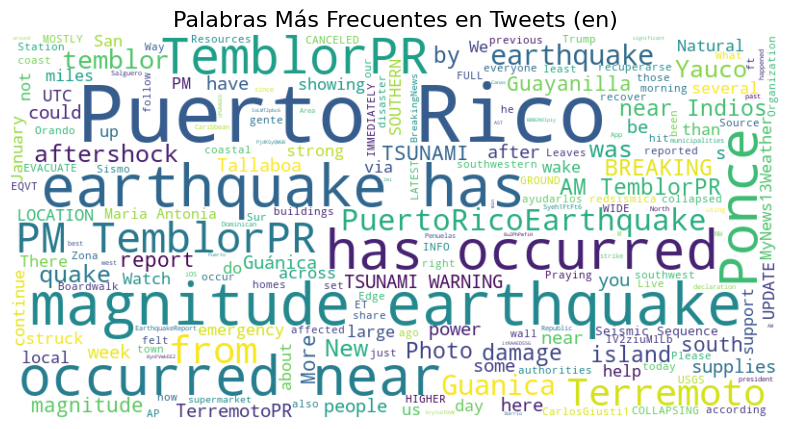

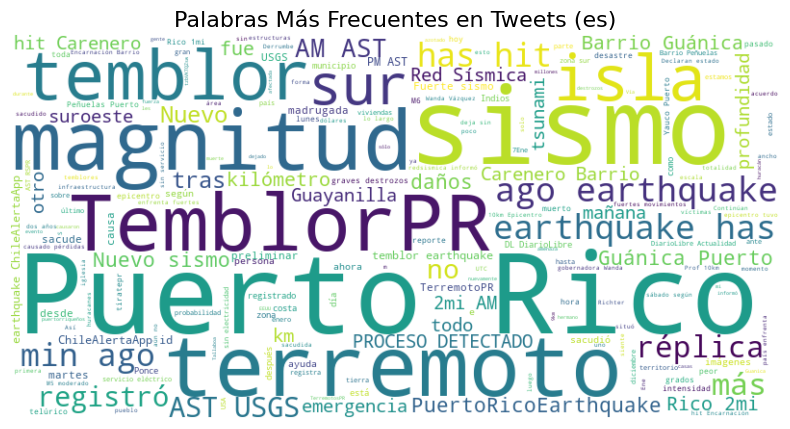

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir conjunto reutilizable de stopwords (palabras vac√≠as)
custom_stopwords = {
    "https", "RT", "co", "amp",
    "de", "a", "t", "el", "que", "se", "la", "en", "por",
    "los", "las", "del", "al", "un", "una", "con", "para",
    "este", "esta", "estos", "estas", "ese", "esa", "esos", "esas",
    "y", "o", "u", "pero", "su", "sus", "porque", "son",
    "ser", "sido", "ha", "han", "hay", "qu√©", "etc", "PuertoRico",
    "the", "is", "to", "of", "and", "in", "for", "on", "at", "with", "as", "this", "that", "it", "are",
}

# Funci√≥n para generar y mostrar una nube de palabras seg√∫n el idioma
def generate_wordcloud_for_language(language_code):
    text = " ".join(
        df_selected[df_selected["Language"] == language_code]["Tweet_Content"].dropna().astype(str)
    )
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
        stopwords=custom_stopwords
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Palabras M√°s Frecuentes en Tweets ({language_code})", fontsize=16)
    plt.show()

# Generar nubes de palabras para ingl√©s y espa√±ol
generate_wordcloud_for_language("en")
generate_wordcloud_for_language("es")


### üåê **Nubes de palabras en idiomas espec√≠ficos**

#### üü© **Tweets en ingl√©s (en)**

- T√©rminos dominantes:
  **"Puerto Rico", "terremoto", "magnitud", "ocurri√≥", "ha", "Ponce", "TemblorPR "**.
  Reflejan **informaci√≥n objetiva y actualizaciones** sobre el suceso, con un uso intensivo de t√©rminos como *"magnitud "*, *"ha ocurrido "* y *"terremoto "*, lo que sugiere tuits centrados en la informaci√≥n.

- Se√±ales de emergencia:
  Frases como **"ADVERTENCIA TSUNAMI", "EVACUAR", "Vigilar", "da√±os "** est√°n presentes pero en menor medida, probablemente s√≥lo en algunos tweets, no dominantes en todos.

- Referencias de ubicaci√≥n:
  Incluye **Gu√°nica, Yauco, Ponce**, se√±alando **zonas afectadas** en el sur de Puerto Rico.

- Observaci√≥n:
  El vocabulario es formal e informativo, probablemente reflejando **cobertura de noticias, alertas o cuentas oficiales**.

---

#### üüß **Tweets en espa√±ol (es)**

- T√©rminos dominantes:
  **"Puerto Rico", "sismo", "terremoto", "temblor", "magnitud", "registr√≥", "r√©plica "**.
  Estos t√©rminos refuerzan el enfoque de la **terminolog√≠a relacionada con los terremotos**, con **"sismo "** y **"terremoto "** en primer plano, con el significado de *terremoto*.

- Contexto temporal y regional:
  T√©rminos como **"min", "ago", "AST", "sur", "km", "profundidad "** sugieren **referencias temporales y geogr√°ficas m√°s descriptivas**.

- Vocabulario emocional y comunitario:
  Palabras como **"emergencia", "da√±os", "im√°genes", "zona", "otro", "isla "** apuntan a un **impacto personal o regional**, posiblemente una narraci√≥n m√°s emocional o actualizaciones locales.

- Observaci√≥n:
  En comparaci√≥n con los tuits en ingl√©s, los contenidos en espa√±ol suelen **describir experiencias vividas** o consecuencias, posiblemente de personas sobre el terreno.

---

### ‚úÖ **An√°lisis**

> **Los tuits en ingl√©s** se centran en **informaci√≥n sobre hechos**, a menudo de fuentes de noticias o alertas, mientras que **los tuits en espa√±ol** muestran un lenguaje m√°s **localizado y descriptivo** que incluye **emoci√≥n, ubicaci√≥n y referencias temporales**. Esto apoya la idea de que los diferentes grupos ling√º√≠sticos en Twitter pueden reflejar **diferentes roles y perspectivas** durante la comunicaci√≥n de desastres.

## Conclusi√≥n

Este an√°lisis ha proporcionado una visi√≥n global del conjunto de datos `PR_Earthquake_Tweets_Jan2020.csv`, centr√°ndose en la participaci√≥n en los tweets, las caracter√≠sticas del contenido y los patrones ling√º√≠sticos. Gracias a la limpieza sistem√°tica de los datos, la ingenier√≠a de caracter√≠sticas y diversas t√©cnicas de exploraci√≥n visual, hemos obtenido informaci√≥n sobre:

- La distribuci√≥n y estructura del contenido de los tweets
- Tendencias temporales de la actividad y la participaci√≥n en los tweets
- Diferencias de participaci√≥n entre idiomas
- Temas comunes expresados por los usuarios a trav√©s de la frecuencia de palabras

Se emplearon diversas herramientas de visualizaci√≥n -est√°ticas e interactivas- para mejorar la interpretabilidad y descubrir patrones en los datos. Este enfoque demuestra c√≥mo el ecosistema de ciencia de datos de Python puede aplicarse eficazmente al an√°lisis de las redes sociales, especialmente en el contexto de acontecimientos en tiempo real como las cat√°strofes naturales.